<a href="https://colab.research.google.com/github/Maxibrionest/FMY-Fundamentos-Machine-Learning/blob/main/Actividad_2_4_2/2_4_2_Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
Clasificaremos si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux.

Para eso, cargaremos un pequeño archivo CSV de 170 registros. La muestra es muy pequeña, por lo cual corremos el riesgo de underfitting u overfitting.

Nuestra información de entrada son 4 características tomadas de una web que utiliza Google Analytics y son:

*   Duración de la visita en Segundos
*   Cantidad de Páginas Vistas durante la Sesión
*   Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
*   Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

0 – Windows
1 – Macintosh
2 -Linux

## Importar las librerías 
Antes de empezar vamos a importar las siguientes librerías: 

- Pandas 
- Numpy 
- Sklearn
- Matplotlib
- Seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

En este caso subiremos subir un primer archivo en forma local (el profesor te facilitirá los archivos) ejecutando lo siguiente:

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dataframe = pd.read_csv(name, sep=",")
dataframe.head()

Saving usuarios_win_mac_lin.csv to usuarios_win_mac_lin.csv


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [ ]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [ ]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

Visualizamos en formato de historial las cuatro características de entrada con nombres “duración”, “páginas”,”acciones” y “valor” podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros

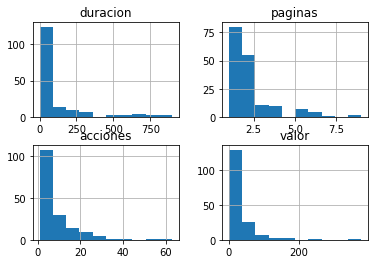

In [ ]:
dataframe.drop(['clase'],1).hist()
plt.show()

También podemos interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en verde y Linux en rojo.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


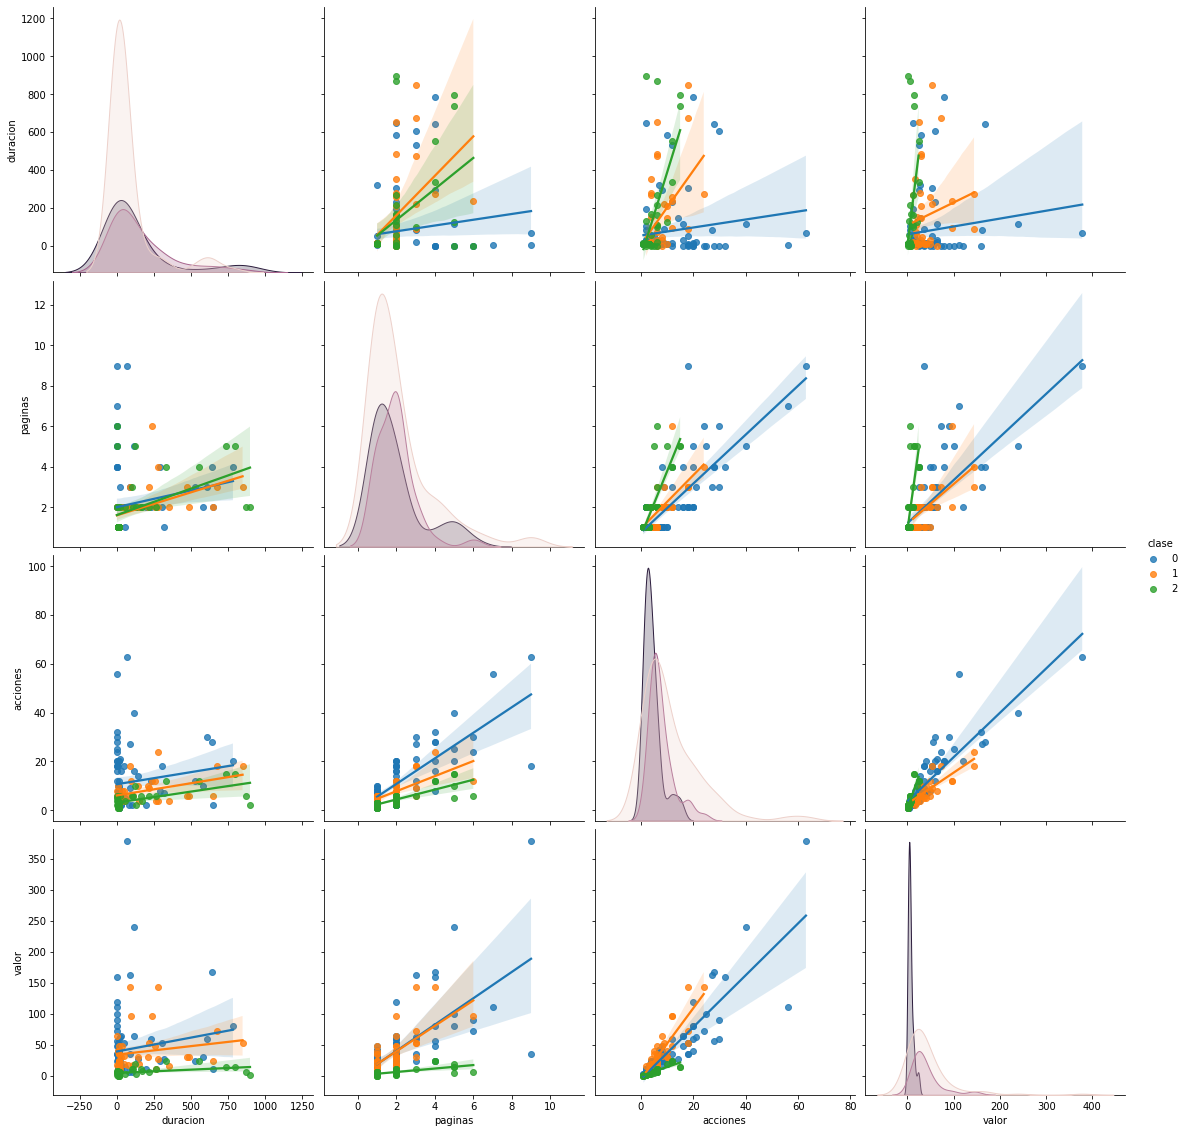

In [ ]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

## Creamos el modelo

Cargamos las variables de las 4 columnas de entrada en X excluyendo la columna “clase” con el método drop(). En cambio agregamos la columna “clase” en la variable y. Ejecutamos X.shape para comprobar la dimensión de nuestra matriz con datos de entrada de 170 registros por 4 columnas

In [ ]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

Y creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.

In [ ]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


Y confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve la precisión media de las predicciones, en nuestro caso ¿de cuanto es el %?

In [ ]:
model.score(X,y)

0.7823529411764706

# Validación del Modelo

Subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar.

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y calculamos el nuevo scoring que ahora nos da 74%

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Y ahora hacemos las predicciones -en realidad clasificación- utilizando nuestro “cross validation set”, es decir del subconjunto que habíamos apartado. En este caso vemos que los aciertos fueron del 85% pero hay que tener en cuenta que el tamaño de datos era pequeño.

In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

# Clasificación de nuevos registros

Como último ejercicio, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

- Tiempo Duración: 10
- Páginas visitadas: 3
- Acciones al navegar: 5
- Valoración: 9

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [ ]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

# CONCLUSIONES

Intenta variar los valores para que la clasificación resultante sea con Windows y con Mac.

Luego, reflexiona sobre lo ejecutado y escribe una conclusión del ejercicio.